In [ ]:
import os
import time
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr
from IPython.display import clear_output

In [ ]:
IDX_ACTION_UP = 0
IDX_ACTION_DOWN = 1
IDX_ACTION_RIGHT = 2
IDX_ACTION_LEFT = 3

STR_ACTION_UP = 'U'
STR_ACTION_DOWN = 'D'
STR_ACTION_RIGHT = 'R'
STR_ACTION_LEFT = 'L'

POINT_WALL = [[1, 1], [1, 3], [2, 3], [3, 0]]
POINT_GOAL = [[3, 3]]

In [ ]:
def print_tracking_graphic(tracking, wall, goal):
    for idx, trk in enumerate(tracking):
        print(idx)
        map_ = [['  ' for _ in range(4)] for _ in range(4)]
        for p_ in wall:
            map_[p_[0]][p_[1]] = '■'
        for p_ in goal:
            map_[p_[0]][p_[1]] = 'G'
        map_[trk[0]][trk[1]] = '☆'
        for row in range(4):
            print(map_[row])
        time.sleep(1)
        if idx < len(tracking)-1:
            clear_output(wait=False)

In [ ]:
def get_point_tracking(log_action):
    tracking = []
    for act_ in log_action:
        row = 0
        col = 0
        cnt = 0
        buf_tracking = [[row, col]]
        while cnt < len(act_):
            if act_[cnt] == IDX_ACTION_UP:
                row -= 1
            elif act_[cnt] == IDX_ACTION_DOWN:
                row += 1
            elif act_[cnt] == IDX_ACTION_RIGHT:
                col += 1
            elif act_[cnt] == IDX_ACTION_LEFT:
                col -= 1
            else:
                pass

            row = 0 if row < 0 else 3 if row >= 4 else row
            col = 0 if col < 0 else 3 if col >= 4 else col
            buf_tracking.append([row, col])
            cnt += 1
        tracking.append(buf_tracking)
    return tracking

In [ ]:
# entry_point : gym.envs 환경 불러오기
register(
    id='LakeEnv-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4', 'is_slippery':False}
)
env = gym.make('LakeEnv-v0')

### np.amax: vector에 있는 값들 중 제일 큰 값을 리턴한다.

In [ ]:
x = [1, 2, 3, 4]
y = np.amax(x)
print(f'np.amax 결과값: {y}')

np.amax 결과값: 4


In [ ]:
x = (1, 2, 3, 4)
y = np.amax(x)
print(f'np.amax 결과값: {y}')

np.amax 결과값: 4


In [ ]:
x = np.array([1, 2, 3, 4])
y = np.amax(x)
print(f'np.amax 결과값: {y}')

np.amax 결과값: 4


In [ ]:
x = [[1, 2, 3, 4], [5, 6, 7, 8]]
y = np.amax(x)
print(f'np.amax 결과값: {y}')

np.amax 결과값: 8


In [ ]:
import tensorflow as tf

W = tf.Variable(tf.random.uniform([16, 4], 0, 0.01), dtype=tf.float32)
print(W)

<tf.Variable 'Variable:0' shape=(16, 4) dtype=float32, numpy=
array([[0.00868166, 0.00934483, 0.00820106, 0.00508401],
       [0.00755097, 0.00251805, 0.00701937, 0.00842373],
       [0.00102838, 0.00120842, 0.00124298, 0.00855689],
       [0.00641803, 0.00304118, 0.00613001, 0.00282294],
       [0.00027545, 0.00590179, 0.0061584 , 0.00607903],
       [0.00925149, 0.00916138, 0.00391882, 0.00879248],
       [0.0071175 , 0.00419181, 0.00953063, 0.00499581],
       [0.00988841, 0.00110458, 0.00460787, 0.00613671],
       [0.00663051, 0.00344684, 0.00992799, 0.0098496 ],
       [0.00773904, 0.00850685, 0.00578428, 0.00945927],
       [0.00285485, 0.0037339 , 0.00745774, 0.00179794],
       [0.00586814, 0.00783353, 0.00223855, 0.00410796],
       [0.00839075, 0.00601778, 0.00927449, 0.00368978],
       [0.00432354, 0.00386185, 0.00602001, 0.00620403],
       [0.00242076, 0.00673061, 0.00845075, 0.00112757],
       [0.00521808, 0.0014299 , 0.00850301, 0.00675943]], dtype=float32)>


고차원 배열도 가능

In [ ]:
y = np.amax(W)
print(f'np.amax 결과값: {y}')

np.amax 결과값: 0.00992798525840044


In [ ]:
y = np.amax(W[0])
print(f'np.amax 결과값: {y}')

np.amax 결과값: 0.009344825521111488


### np.nonzero: vector의 요소들 중 0이 아닌 값들의 index를 반환해주는 함수

In [ ]:
x = [1, 0, 0, 4]
y = np.nonzero(x)
print(f'np.nonzero 결과값: {y}')

np.nonzero 결과값: (array([0, 3]),)


In [ ]:
x = [1, 0, 0, 0]
y = np.nonzero(x)
print(f'np.nonzero 결과값: {y}')

np.nonzero 결과값: (array([0]),)


In [ ]:
x = [[1, 0, 0, 4], [0, 1, 3, 0]]
y = np.nonzero(x)
print(x)
print(f'np.nonzero 결과값: {y}')

[[1, 0, 0, 4], [0, 1, 3, 0]]
np.nonzero 결과값: (array([0, 0, 1, 1]), array([0, 3, 1, 2]))


In [ ]:
x = np.array([[1, 0, 7], [8, 1, 0], [1, 0, 0]])
y = np.nonzero(x)
print(x)
print(f'np.nonzero 결과값: {y}')

[[1 0 7]
 [8 1 0]
 [1 0 0]]
np.nonzero 결과값: (array([0, 0, 1, 1, 2]), array([0, 2, 0, 1, 0]))


np.transpose는 행과 열을 바꿔준다.

In [ ]:
y = np.transpose(np.nonzero(x))
print('np.nonzero 결과값 해석')
print(y)

np.nonzero 결과값 해석
[[0 0]
 [0 2]
 [1 0]
 [1 1]
 [2 0]]


In [ ]:
print(f'x[0, 0]: {x[0, 0]}')
print(f'x[0, 2]: {x[0, 2]}')
print(f'x[1, 0]: {x[1, 0]}')
print(f'x[1, 1]: {x[1, 1]}')
print(f'x[2, 0]: {x[2, 0]}')

x[0, 0]: 1
x[0, 2]: 7
x[1, 0]: 8
x[1, 1]: 1
x[2, 0]: 1


In [ ]:
x = [[1, 0, 0, 4], [0, 1, 3, 0]]
y1 = np.nonzero(x)[0]
y2 = np.nonzero(x)[1]
print(y1)
print(y2)

[0 0 1 1]
[0 3 1 2]


In [ ]:
x[0]

[1, 0, 0, 4]

In [ ]:
x[1]

[0, 1, 3, 0]

### rargmax 함수 구현 및 분석

In [ ]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [ ]:
x = [1, 0, 0, 0]
m = np.amax(x)
i = np.nonzero(x)
print(f'np.amax: {m}')
print(f'np.nonzero: {i}')

np.amax: 1
np.nonzero: (array([0]),)


In [ ]:
i = np.nonzero([1])
print(f'np.nonzero: {i}')

np.nonzero: (array([0]),)


In [ ]:
m = np.amax(x)
i = np.nonzero(x == m)[0]
print(i)

[0]


In [ ]:
x = [0, 0, 1, 0]
m = np.amax(x)
i = np.nonzero(x == m)[0]
print(i)

[2]


# Dummy Q-learning 구현

Success rate : 0.968
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


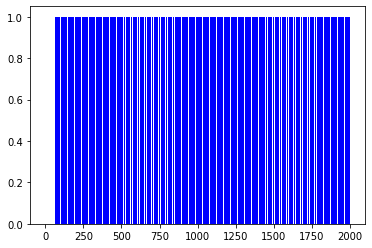

In [ ]:
# 시작하자마자 q-value 생성 및 초기화
q_value = np.zeros([env.observation_space.n, env.action_space.n])

# reword 저장
log_action = []
log_q_value = []
log_reword = []

num_episodes = 2000

# 학습을 진행하면서 q-value는 초기화하지 않고 남겨서 다음에 더 빨리 목적지에 도달할 수 있게 합니다
for i in range(num_episodes):
    done = False
    rAll = 0
    state = env.reset()

    buf_q = []
    buf_act = []

    while not done:
        action = rargmax(q_value[state, :])
        next_state, reward, done, _ = env.step(action)

        q_value[state, action] = reward + np.max(q_value[next_state, :])
        buf_q.append(list(q_value[state]))
        if done:
             buf_q.append(list(q_value[next_state]))

        buf_act.append(action)
        rAll += reward
        state = next_state
    
    log_q_value.append(buf_q)
    log_action.append(buf_act)
    log_reword.append(rAll)
        
print("Success rate : "+ str(sum(log_reword) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(log_reword)), log_reword, color="blue")
plt.show()

1. q-table에서 해당하는 state의 행을 가져온다.
2. rargmax 함수를 통해 action을 선택한다.
3. goal지점에 도착할 때 까지 state에서 action을 취할 때 얻는 q-value값을 받아온다.
4. goal지점에도착하면 한 에피소드 종료



In [ ]:
Q = np.identity(10)
Q

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
Q[0, :]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
Q[7, :]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
Q = np.zeros([4, 4])
Q[0, 2] = 1
Q

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

한 에피소드에서 나오는 action과 q-value값을 저장하고 for문 밖에 리스트에 저장해서 한 에피소드의 action과 q-value를 알 수 있도록 구현했다.

In [ ]:
buf_q[-2]

[0.0, 0.0, 1.0, 0.0]

In [ ]:
log_q_value[-1]

[[0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

In [ ]:
buf_act[-1]

2

In [ ]:
log_action[-1]

[2, 2, 1, 1, 1, 2]

## 시각화 함수 분석